In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
tips['smoker_bin'] = tips['smoker'].map({
    'Yes': 1,
    'No' : 0}
)

tips['sex_bin'] = tips['sex'].map({
    'Male': 1,
    'Female' : 0}
)

tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1


In [4]:
#X = tips[['smoker_bin']] # 0101011101110101

# y = tips['tip'] # continuous

# convert the target column, then use it for y

X = tips[['total_bill']] 

y = tips['smoker_bin']


#y = tips['sex_bin'] # encoded column

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.2)


In [6]:
model_dt = DecisionTreeClassifier() 
model_lr = LogisticRegression()

model_dt.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

In [7]:
cr_dt = classification_report(y_test,y_pred_dt)
cr_lr = classification_report(y_test,y_pred_lr)

print(cr_dt,cr_lr)

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        31
           1       0.29      0.28      0.29        18

    accuracy                           0.49        49
   macro avg       0.44      0.45      0.44        49
weighted avg       0.48      0.49      0.49        49
               precision    recall  f1-score   support

           0       0.63      0.94      0.75        31
           1       0.33      0.06      0.10        18

    accuracy                           0.61        49
   macro avg       0.48      0.50      0.42        49
weighted avg       0.52      0.61      0.51        49



<function matplotlib.pyplot.show(close=None, block=None)>

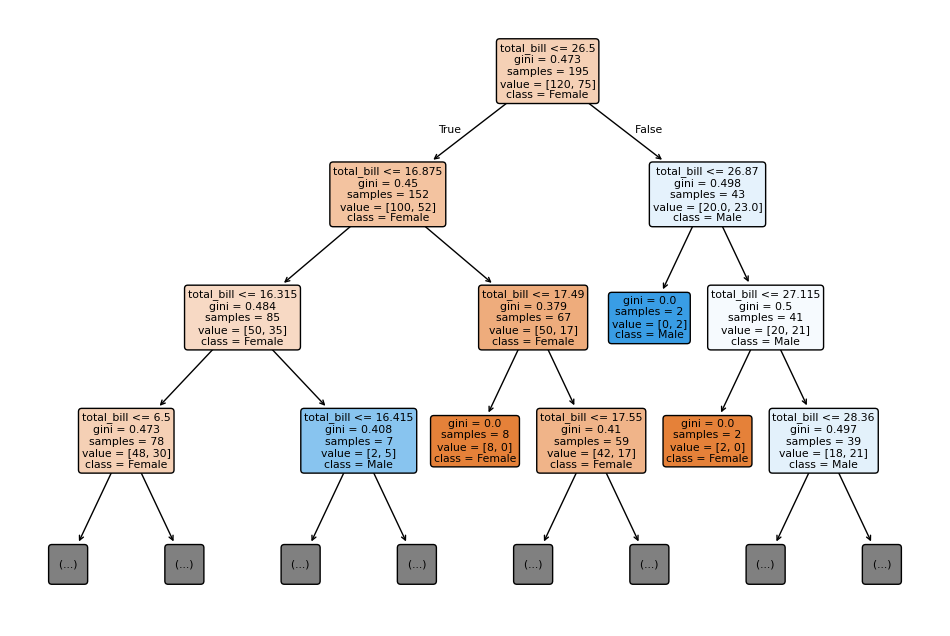

In [8]:
plt.figure(figsize=(12,8))

plot_tree(model_dt, 
          feature_names=['total_bill'], 
          class_names=tips['sex'], 
          max_depth=3,
          filled=True,
          rounded=True)
        
plt.show

In [9]:
model_rf = RandomForestClassifier(n_estimators=10) 

model_rf.fit(X_train, y_train) 

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [10]:
y_pred_rf = model_rf.predict(X_test)

cr_rf = classification_report(y_test,y_pred_rf)

print(cr_rf)
print(cr_dt)



              precision    recall  f1-score   support

           0       0.63      0.71      0.67        31
           1       0.36      0.28      0.31        18

    accuracy                           0.55        49
   macro avg       0.49      0.49      0.49        49
weighted avg       0.53      0.55      0.54        49

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        31
           1       0.29      0.28      0.29        18

    accuracy                           0.49        49
   macro avg       0.44      0.45      0.44        49
weighted avg       0.48      0.49      0.49        49



In [11]:
model_ada = AdaBoostClassifier(n_estimators=10) 

model_ada.fit(X_train, y_train) 

y_pred_ada = model_ada.predict(X_test)

cr_ada = classification_report(y_test,y_pred_ada)

print(cr_ada)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        31
           1       0.40      0.11      0.17        18

    accuracy                           0.61        49
   macro avg       0.52      0.51      0.46        49
weighted avg       0.55      0.61      0.54        49

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        31
           1       0.36      0.28      0.31        18

    accuracy                           0.55        49
   macro avg       0.49      0.49      0.49        49
weighted avg       0.53      0.55      0.54        49

